In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from batty import BAT_sampler, BAT, Distributions

/mnt/c/Users/peller/work/batty/batty.py:6: UserWarning: Not able to use compiled modules, resulting in (very) slow import
 See https://pyjulia.readthedocs.io/en/latest/troubleshooting.html
  warnings.warn("Not able to use compiled modules, resulting in (very) slow import\n See https://pyjulia.readthedocs.io/en/latest/troubleshooting.html")


# Minimal Example

In [3]:
sampler = BAT_sampler(llh=lambda x : -0.5 * x**2, prior_specs=Distributions.Uniform(-3, 3))

In [4]:
result = sampler.sample(strategy=BAT.MCMCSampling(nsteps=1000))

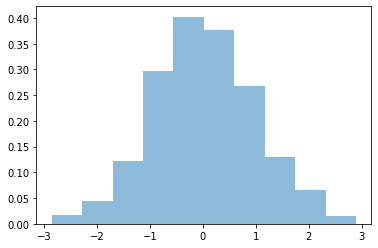

In [5]:
plt.hist(result.v, weights=result.weight, density=True, alpha=0.5);

In [6]:
sampler.integrate()

0.4159976636651354+/-0.0016093883399367558

# More Complicated Example

In [7]:
s = np.random.rand(2,2)
prior_specs = {'a' : Distributions.Uniform(-3,3), 'b' : Distributions.MvNormal([1,1], s@s.T), }

In [8]:
def llh(x, d):
    return -0.5 * ((x.b[0] - d[0])**2 + (x.b[1] - d[1])**2/4) - x.a

In [9]:
d = [-1, 1]

In [10]:
sampler = BAT_sampler(llh, prior_specs, llh_args=(d,))

In [11]:
%%time
sampler.sample(strategy=BAT.MCMCSampling(nsteps=1000, nchains=2, mcalg=BAT.MetropolisHastings(weighting=BAT.ARPWeighting())));

CPU times: user 16.8 s, sys: 701 ms, total: 17.5 s
Wall time: 17.5 s


<Array [{weight: 7.94, logd: -3.23, ... ] type='1922 * {"weight": float64, "logd...'>

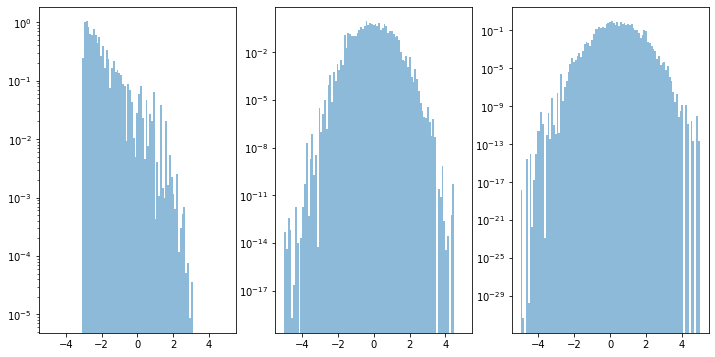

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(12,6))

bins = np.linspace(-5,5,100)

ax[0].hist(sampler.samples.v.a, weights=sampler.samples.weight, bins=bins, density=True, alpha=0.5);
ax[1].hist(sampler.samples.v.b[:,0], weights=sampler.samples.weight, bins=bins, density=True, alpha=0.5);
ax[2].hist(sampler.samples.v.b[:,1], weights=sampler.samples.weight, bins=bins, density=True, alpha=0.5);

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')

In [13]:
sampler.integrate(strategy=BAT.AHMIntegration())

0.6704965810768958+/-0.039336616801160844